# Controller for the locking of the laser

In [1]:
%load_ext autoreload
%autoreload 2

from GettingStarted_lib.Interface import Interface
from GettingStarted_lib.LaserLockingController import LaserLockingController
import pprint

## Creating the interface:

It contains everything is needed for the comunications with the linien server in the RedPitaya.
- connection to the board;
- Initialization of the parameters;
- Parameters modification.

In [2]:
RP_Interface = Interface()
RP_Locking_Controller = LaserLockingController(RP_Interface)

2025-12-18 16:24:59 - Interface - INFO - Configuration loaded from /home/bec3/Desktop/Simone_Damian/Serafini/GettingStarted_lib/connect_config.yaml:

2025-12-18 16:24:59 - Interface - INFO - Attempting connection via RedPitaya_K address (192.168.1.159:18862)


linien_client.connection       INFO     Try to connect to 192.168.1.159:18862
linien_client.connection       DEBUG    Sent authentication hash
linien_client.connection       INFO     Connection established!


2025-12-18 16:25:02 - Interface - INFO - Connected to device via RedPitaya_K address
2025-12-18 16:25:03 - DataHandler - INFO - All reference lines loaded successfully.
2025-12-18 16:25:03 - LaserLockingController - INFO - LaserLockController initialized successfully.


In [59]:
pprint.pprint(vars(RP_Interface))

RP_Interface.client.parameters.check_for_changed_parameters()
params = RP_Interface.client.parameters
for name, param in vars(params).items():
    # Only pick those attributes that are actual Linien parameters
    if hasattr(param, "value"):
        print(f"{name}: {param.value}")

{'DEVICES': {'RedPitaya_K': {'ip': '192.168.1.159',
                             'linien_port': 18862,
                             'ssh_port': 22}},
 'PASSWORD': 'root',
 'USERNAME': 'root',
 'client': <linien_client.connection.LinienClient object at 0x7078b400df30>,
 'device': Device(key='dhmtcalcvf',
                  name='',
                  host='192.168.1.159',
                  port=18862,
                  username='root',
                  password='root',
                  parameters={}),
 'logger': <Logger Interface (INFO)>,
 'readable_params': {'control_signal_history': <GettingStarted_lib.Interface.ReadableParameter object at 0x7078b2ffea40>,
                     'monitor_signal_history': <GettingStarted_lib.Interface.ReadableParameter object at 0x7078b2ffc1f0>,
                     'sweep_signal': <GettingStarted_lib.Interface.ReadableParameter object at 0x7078b2ffdc00>},
 'writeable_params': {'big_offset': <GettingStarted_lib.Interface.WriteableParameter object at 0x70

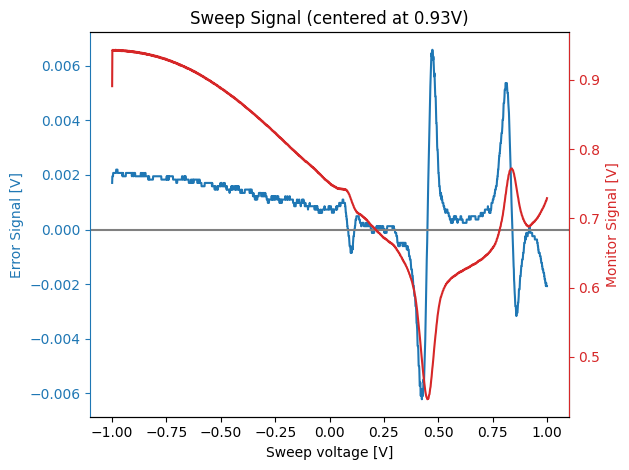

In [220]:
RP_Interface.plot_sweep()

In [225]:
RP_Interface.adjust_vertical_offset()

Actual offset_a: 0.0
New offset_a set to: 5.0


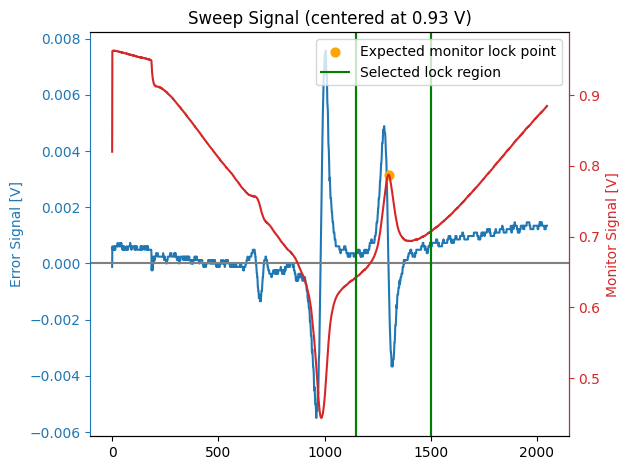

checking lock status...
checking lock status...
checking lock status...
checking lock status...
checking lock status...
Locking the laser worked! \o/
2025-12-15 15:57:58 - UnlockEventsLogger - INFO - Laser locked at time: 2025-12-15 15:57:58


In [72]:
RP_Interface.start_sweep()
RP_Locking_Controller.start_manual_locking()

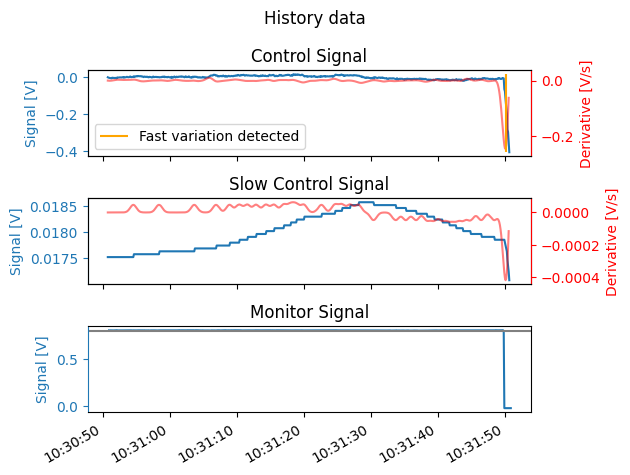

Laser lost locking
Trying to center the line looking at the slow control signal...


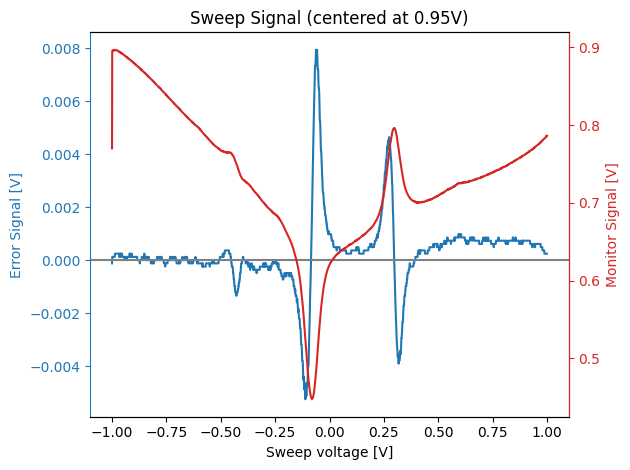

In [120]:
RP_Locking_Controller.start_locking_monitor()

In [213]:
RP_Interface.start_sweep()

2025-12-17 08:38:46 - LaserLockingController - INFO - Starting scan from 0.9V to 1.0V with 10 points.
Scanning at voltage 1.000V (10/10) [##########] (44.31s) Done!
2025-12-17 08:39:31 - LaserLockingController - INFO - Scan completed successfully.


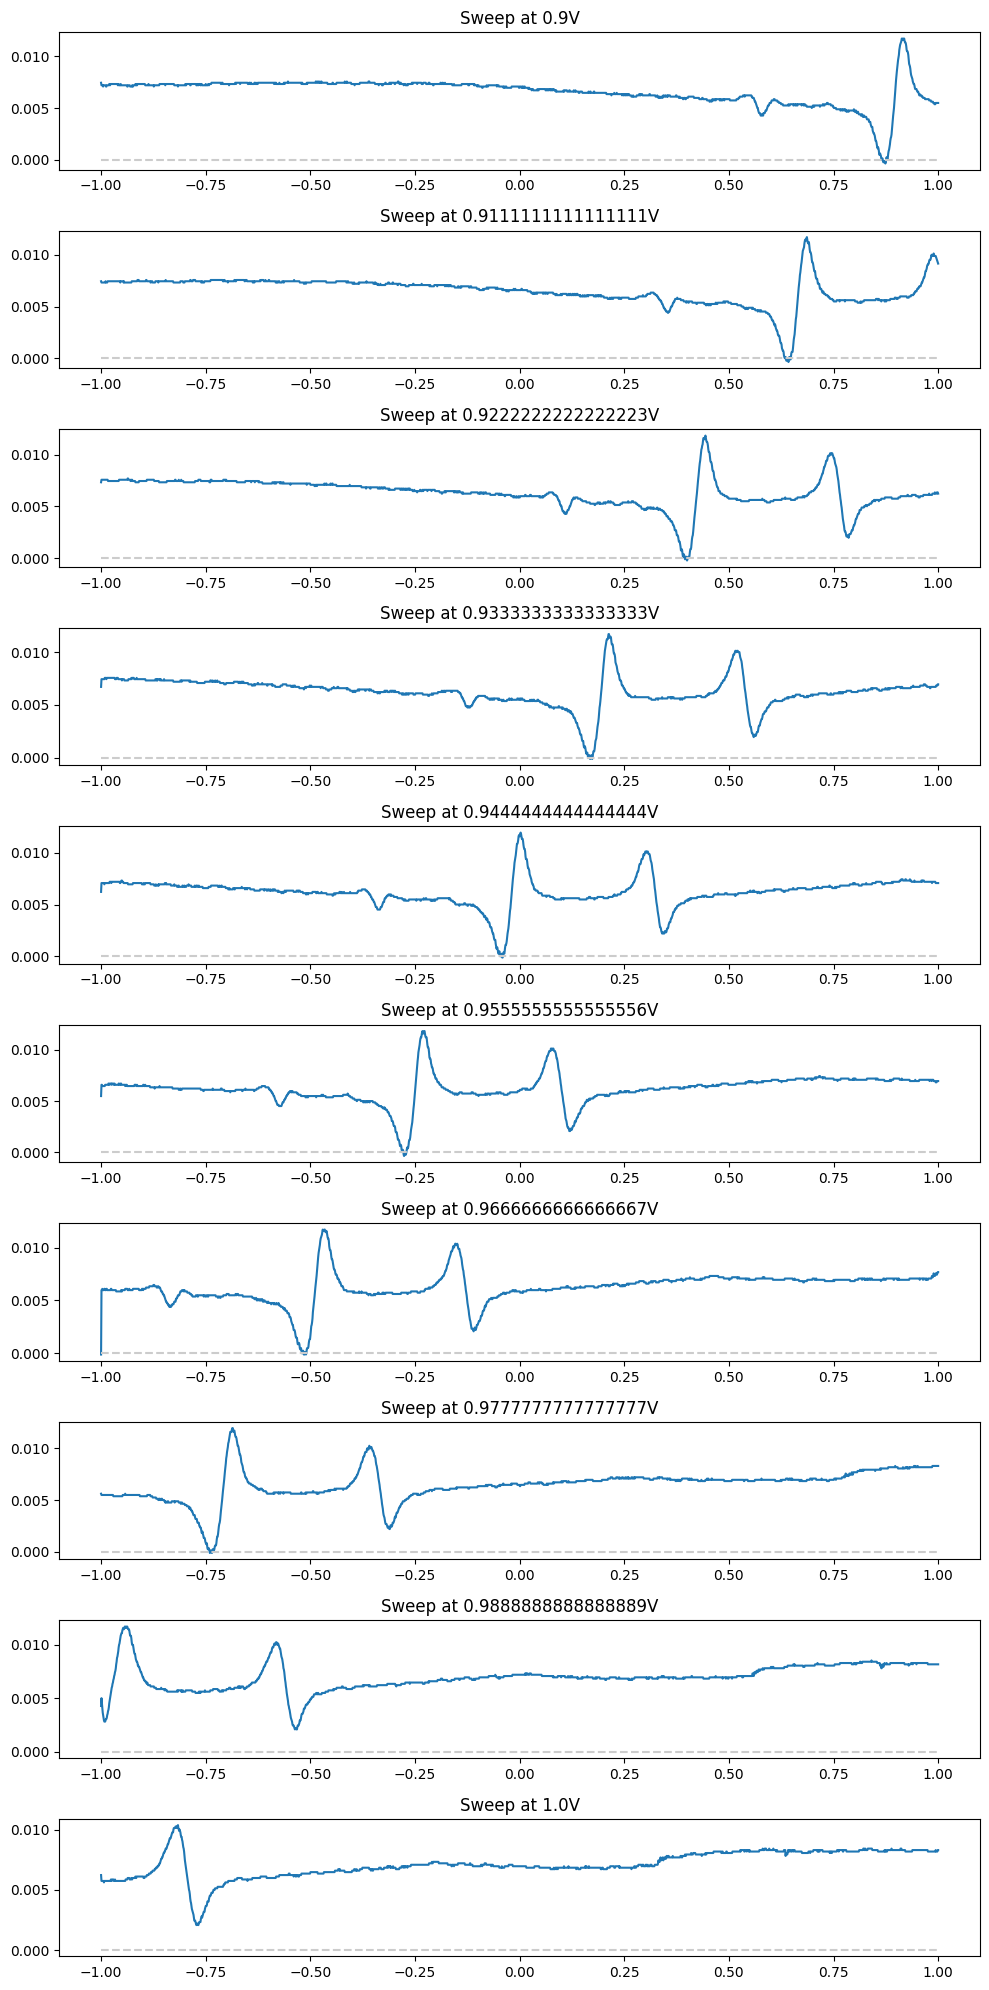

In [199]:
RP_Locking_Controller.scan(0.9, 1.0, 10)

2025-12-17 08:40:17 - LaserLockingController - INFO - Saving reference line with key K_D2.


2025-12-17 08:40:17 - DataHandler - INFO - Saved reference line: REFERENCE_LINE_K_D2.npy
2025-12-17 08:40:17 - DataHandler - INFO - All reference lines loaded successfully.


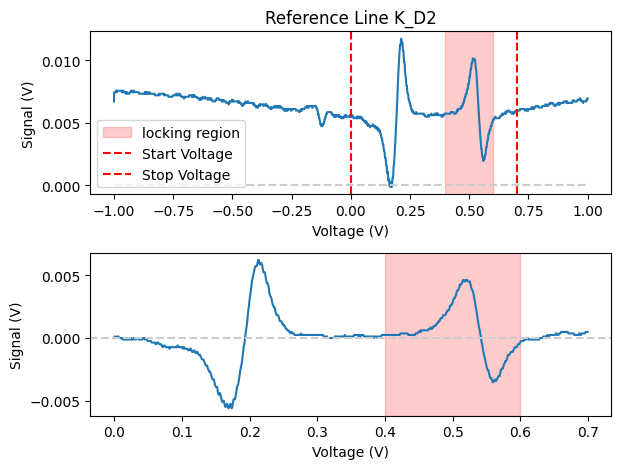

2025-12-17 08:40:17 - LaserLockingController - INFO - Reference line K_D2 saved successfully.


In [201]:
RP_Locking_Controller.save_reference_line(key = 'K_D2', V_scan = 0.933, start_voltage=0, stop_voltage=0.70, V_lock_start = 0.4, V_lock_end = 0.6, offset=-0.0055)

2025-12-17 08:40:50 - LaserLockingController - INFO - Finding reference lines.


Scanning at voltage 1.000V (10/10) [##########] (37.31s) Done!
0.0


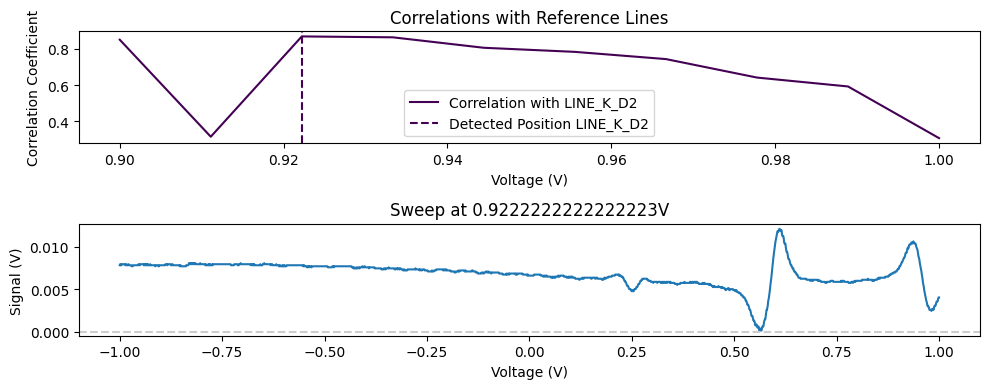

2025-12-17 08:41:30 - LaserLockingController - INFO - Reference lines found successfully.


In [202]:
RP_Locking_Controller.find_reference_lines(start_voltage = 0.9, stop_voltage = 1.0, num_points = 10)

In [204]:
RP_Interface.check_for_changed_parameters()
RP_Interface.get_remote_value('offset_a')

0.0

In [205]:
RP_Locking_Controller.set_debug_mode()

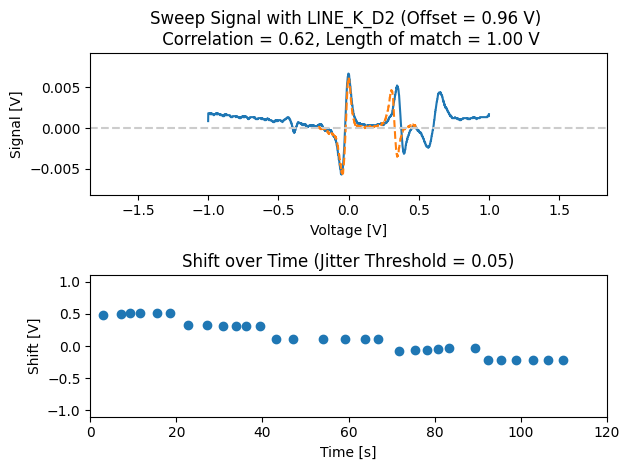

2025-12-17 08:44:21 - LaserLockingController - DEBUG - Frequency stable enough
2025-12-17 08:44:21 - LaserLockingController - INFO - Line LINE_K_D2 is centered at offset 0.9622222222222223.
2025-12-17 08:44:21 - LaserLockingController - DEBUG - Starting autolock between indices 1215 and 1420.
2025-12-17 08:44:21 - LaserLockingController - DEBUG - First 10 values of sweep signal raw: [ 7. 15. 15. 15. 15. 15. 15. 15. 15. 15.]
Started autolock
checking lock status...
checking lock status...
checking lock status...
checking lock status...
checking lock status...
2025-12-17 08:44:26 - LaserLockingController - INFO - Locking the laser worked \o/
2025-12-17 08:44:28 - LaserLockingController - INFO - Locking the laser failed :(
2025-12-17 08:44:28 - LaserLockingController - INFO - Exiting centering and locking procedure.


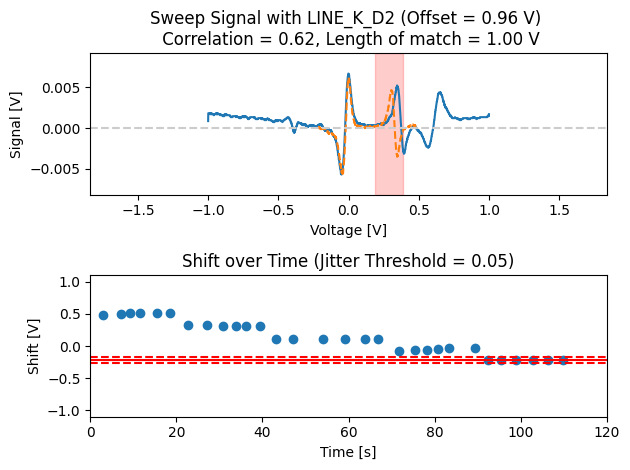

In [206]:
RP_Locking_Controller.center_and_lock_v1('LINE_K_D2')

In [ ]:
RP_Locking_Controller.set_debug_mode()

In [215]:
RP_Locking_Controller.unset_debug_mode()

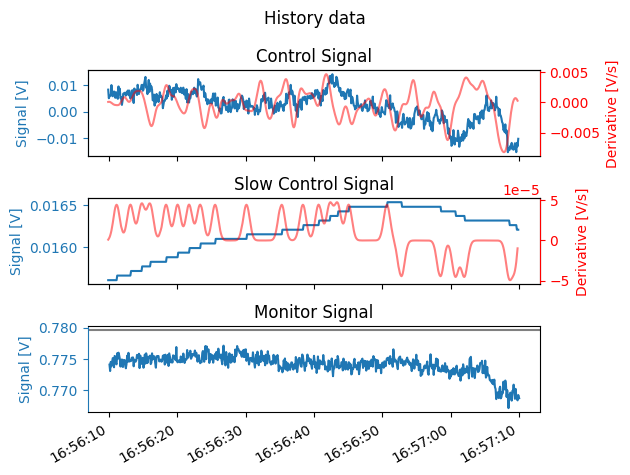

KeyboardInterrupt: 

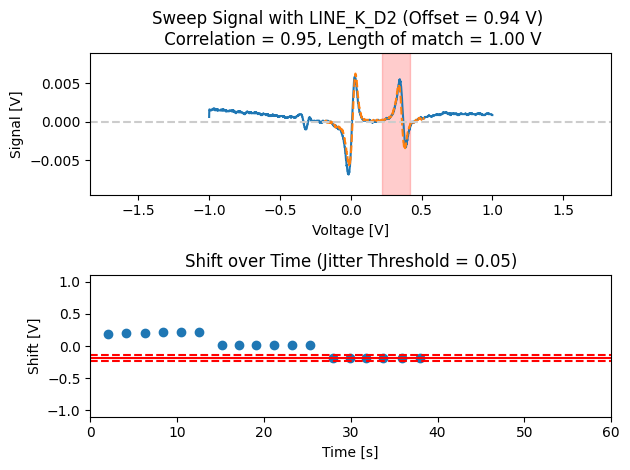

In [3]:
RP_Locking_Controller.automatic_lock_relock('LINE_K_D2')

In [4]:
RP_Interface.start_sweep()

## Analog out test

In [32]:
RP_Interface.check_for_changed_parameters()
RP_Interface.get_remote_value('offset_a')
RP_Interface.get_remote_value('big_offset')


0.0

In [223]:
RP_Interface.set_value('big_offset', 0.93)